In [195]:
import pandas as pd
import dlib
from imutils import face_utils
import config as Config
import src.utils as Utils
import cv2
import random
import joblib
from matplotlib import pyplot as plt

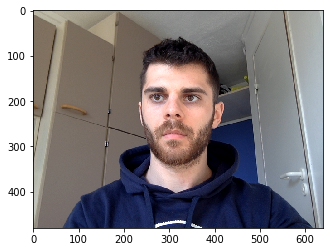

In [196]:
cv2_image = cv2.imread('./data/images/1_110.png')
cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
plt.imshow(cv2_image)

In [197]:
face_detector = dlib.get_frontal_face_detector()
face_predictor = dlib.shape_predictor(Config.face_landmarks_path)

In [198]:
gray_image = Utils.convert_to_gray_image(cv2_image)

In [199]:
rects = face_detector(gray_image, 0)
shape = face_predictor(gray_image, rects[0])
shape = face_utils.shape_to_np(shape)

In [200]:
(left_eye_start, left_eye_end) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(right_eye_start, right_eye_end) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [201]:
start, end = min(left_eye_start, right_eye_start), max(left_eye_end, right_eye_end)
# get the contour
strip = shape[start:end]
# get the upper left point, lower right point
start = [min(strip, key = lambda x: x[0])[0], min(strip, key = lambda x: x[1])[1]]
end = [max(strip, key = lambda x: x[0])[0], max(strip, key = lambda x: x[1])[1]]

(15, 104, 3)


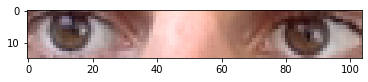

In [202]:
# get the image
strip = cv2_image[start[1]:end[1], start[0]:end[0]]
plt.imshow(strip)
print (strip.shape)

In [203]:
# go a little bit outside the bounding box
print (start, end)
distance = (end[0] - start[0], end[1] - start[1])
percents = [20, 60]
for i in range (0, 2):
    start[i] -= int(percents[i]/100 * distance[i])
    end[i] += int(percents[i]/100 * distance[i])
print (start, end)

[261, 186] [365, 201]
[241, 177] [385, 210]


(33, 144, 3)


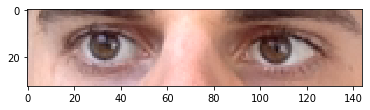

In [205]:
strip = cv2_image[start[1]:end[1], start[0]:end[0]]
plt.imshow(strip)
print (strip.shape)

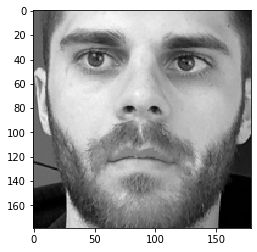

In [214]:
cv2_image = cv2.imread('./report/images/extracted_face.png')
cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2_image, cmap='gray')